In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv("Advertising.csv")


In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [7]:
# defree до какой степени создавать полиномы
# include_bias наличие постоянной константы
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [10]:
poly_features = polynomial_converter.transform(X)

In [12]:
poly_features.shape

(200, 9)

In [13]:
# сначала 3 признака, потом попарные перемножения признаков, потом квадраты исходных признаков
# то есть получаю расширенный набор признаков
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [14]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
test_predictions = model.predict(X_test)

In [23]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [24]:
RMSE

0.6646431757269019

In [25]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    # Создаём полиномиальные данные для степени "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    # делаю набор признаков под степень полинома
    poly_features = polynomial_converter.fit_transform(X)
    
    # Разбиваем эти новые полиномиальные данные на обучающий и тестовый наборы данных
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # Обучаем модель на этом новом наборе полиномиальных данных
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # Выполняем предсказание и на обучающем, и на тестовом наборе данных
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Вычисляем ошибки
    
    # Ошибки на обучающем наборе данных
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Ошибки на тестовом наборе данных
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Добавляем ошибки в список для последующего нанесения на график
       
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [26]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020657,
 0.35170836883993584,
 0.2509342986383564,
 0.1992945643722808,
 5.419139410889907,
 0.15123423820373452,
 0.17171052265410153]

In [27]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269019,
 0.5803286825231682,
 0.5077742654793547,
 2.575810057417929,
 4.265907641196195,
 1382.2051637442403,
 3733.4276789297824,
 95489.32391816446]

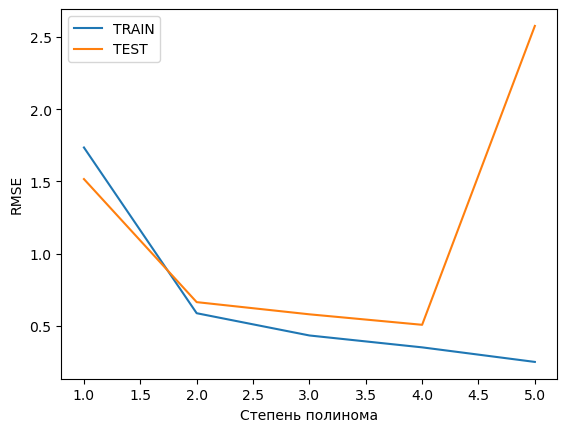

In [34]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Степень полинома")
plt.ylabel("RMSE")
plt.legend()

In [35]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [36]:
final_model = LinearRegression()

In [37]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [38]:
from joblib import dump, load

In [39]:
dump(final_model, 'train_poly_model.joblib')

['train_poly_model.joblib']

In [40]:
dump(final_poly_converter,'train_poly_converter.joblib')

['train_poly_converter.joblib']

In [41]:
loaded_poly = load('train_poly_converter.joblib')
loaded_model = load('train_poly_model.joblib')

In [42]:
campaign = [[149,22,12]]

In [43]:
campaign_poly = loaded_poly.fit_transform(campaign)

In [44]:
campaign_poly.shape

(1, 19)

In [45]:
final_model.predict(campaign_poly)

array([14.64501014])